<a href="https://colab.research.google.com/github/eternaldemon/Deep-Learning/blob/master/Digit_Recognition(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

data = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = data.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train.flatten()


array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
temp = model.fit(x_train,y_train, epochs =100, verbose = 1, validation_data=(x_test,y_test))

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.9144 - val_loss: 0.1414 - val_accuracy: 0.9572
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1419 - accuracy: 0.9580 - val_loss: 0.1003 - val_accuracy: 0.9697
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9679 - val_loss: 0.0842 - val_accuracy: 0.9742
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0878 - accuracy: 0.9732 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0742 - accuracy: 0.9763 - val_loss: 0.0748 - val_accuracy: 0.9786
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0630 - accuracy: 0.9801 - val_loss: 0.0765 - val_accuracy: 0.9780
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9812 - val_loss: 0.0713 - val_ac

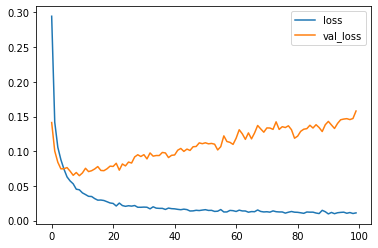

In [ ]:
import matplotlib.pyplot as plt
plt.plot(temp.history['loss'],label='loss')
plt.plot(temp.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#plotting loss per iteration

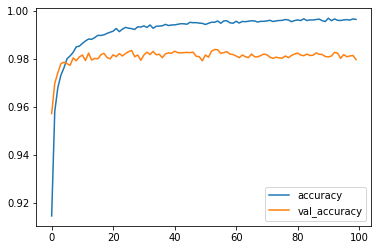

In [ ]:
plt.plot(temp.history['accuracy'], label='accuracy')
plt.plot(temp.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
#Plotting Accuracy per iteration

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1580 - accuracy: 0.9797


[0.15798723697662354, 0.9797000288963318]

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion matrix")
  else:
    print("Confusion matrix without Normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2.0
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt), horizontalalignment="center", color ="white" if cm[i,j] >thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()




Confusion matrix without Normalization
[[ 971    1    0    0    0    3    3    1    1    0]
 [   1 1124    3    1    0    1    2    1    2    0]
 [   1    1 1011    4    4    0    2    6    3    0]
 [   0    0    5  988    0    4    0    6    2    5]
 [   0    0    0    0  967    0    8    0    1    6]
 [   2    0    0    9    1  869    4    1    3    3]
 [   3    3    2    0    3    4  941    0    2    0]
 [   2    2   11    1    1    0    0 1006    2    3]
 [   3    2    3    3    4    7    0    5  944    3]
 [   3    3    0    6    9    3    0    8    1  976]]


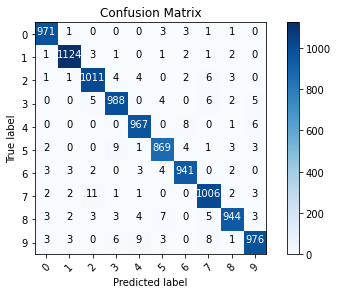

In [ ]:
p_test = model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_cm(cm,list(range(10)))

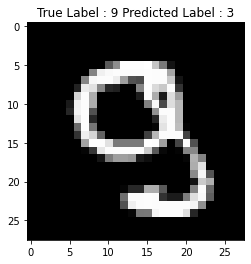

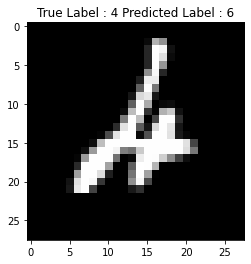

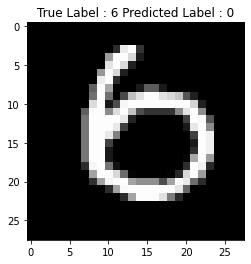

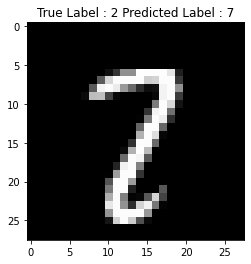

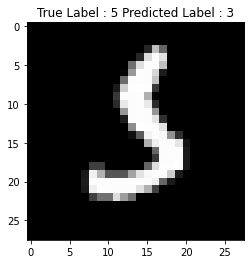

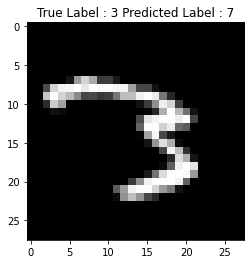

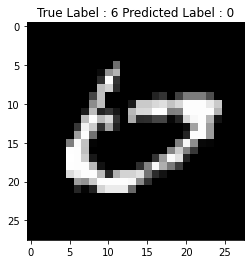

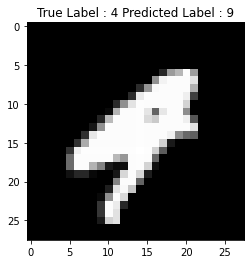

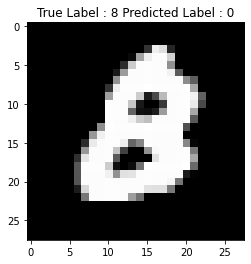

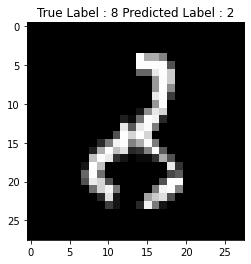

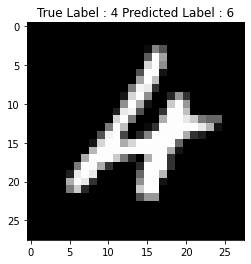

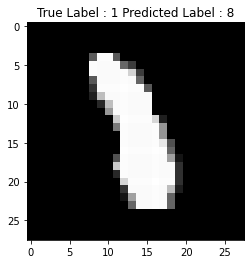

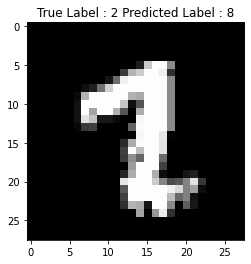

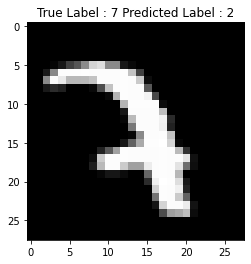

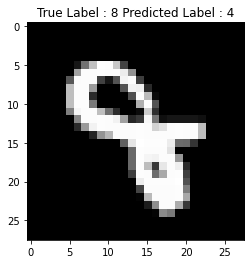

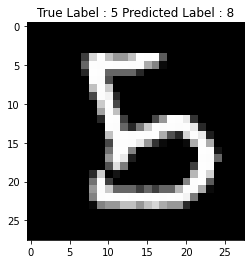

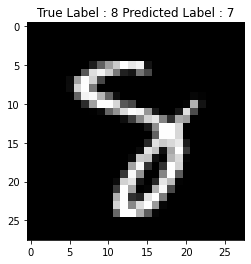

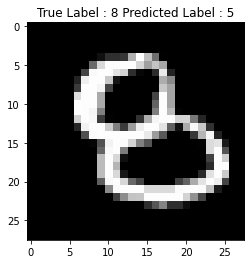

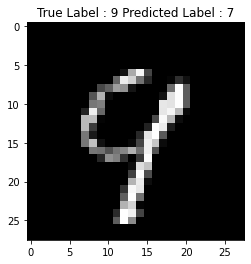

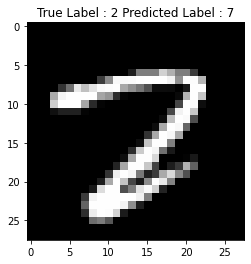

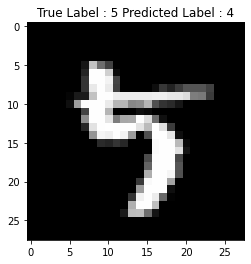

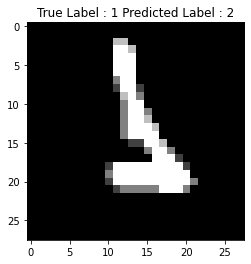

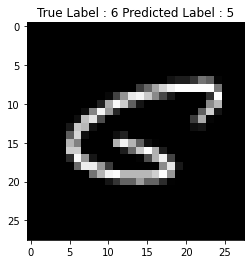

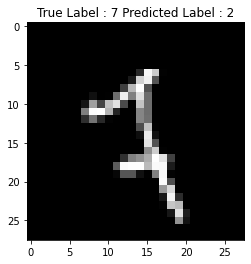

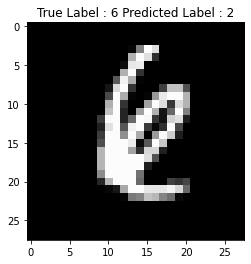

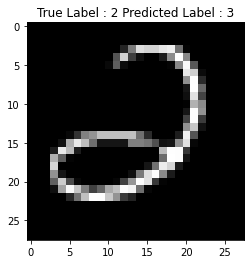

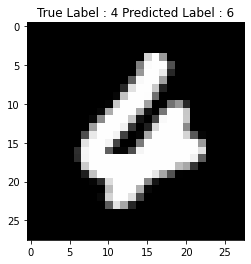

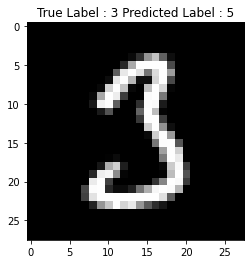

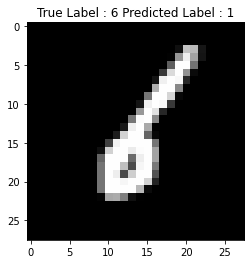

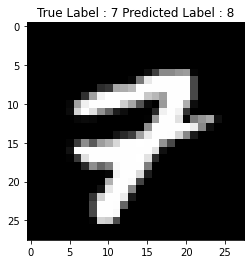

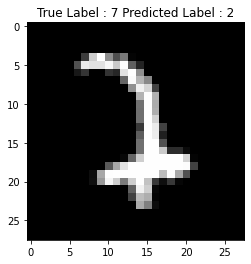

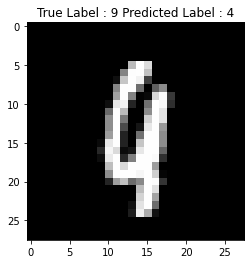

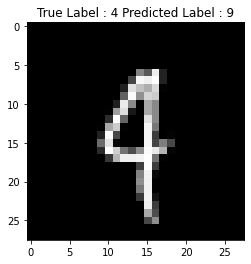

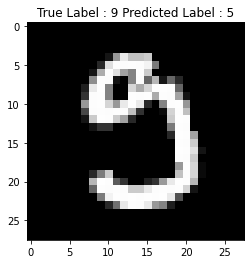

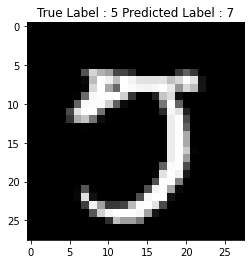

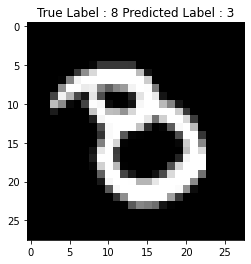

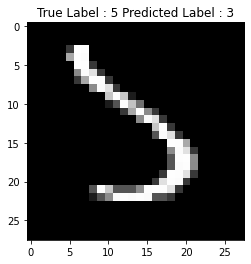

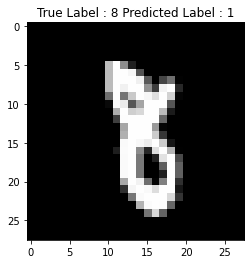

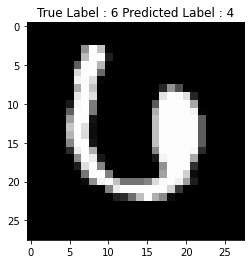

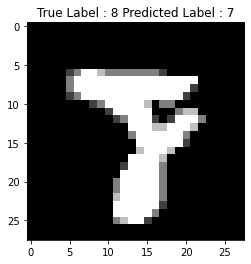

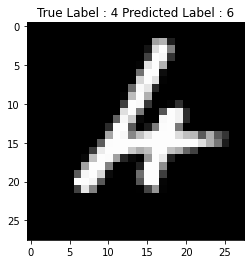

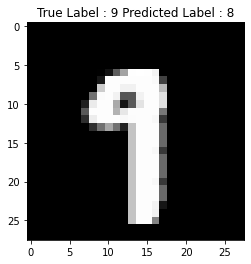

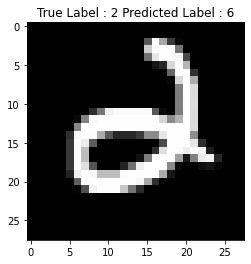

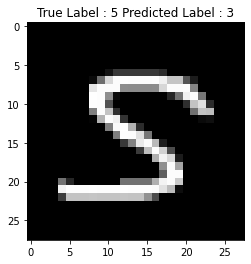

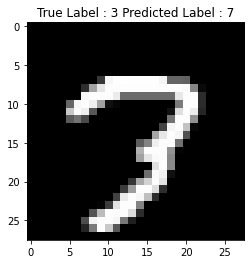

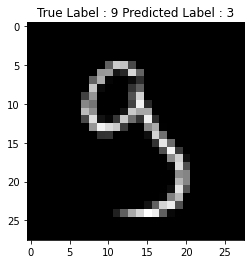

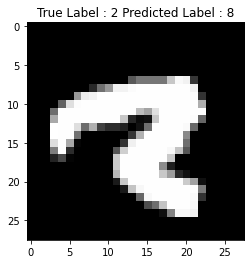

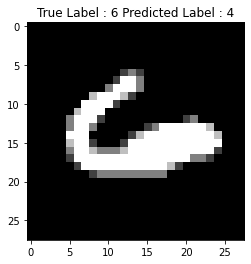

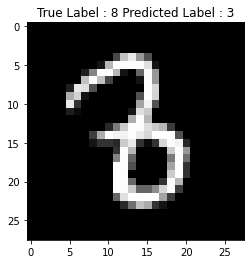

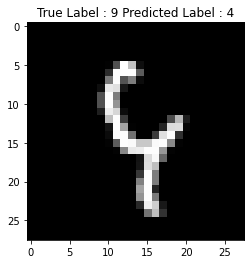

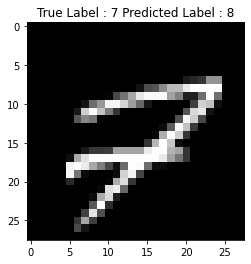

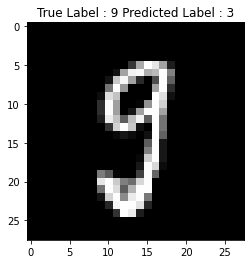

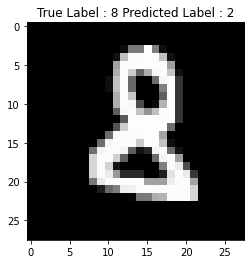

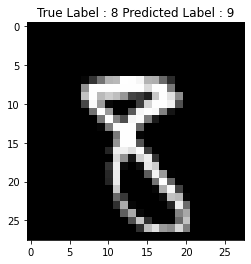

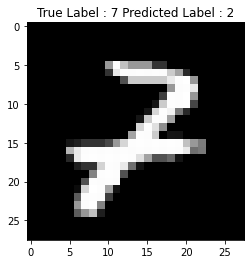

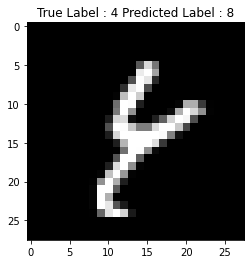

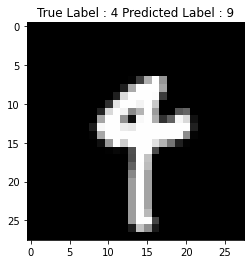

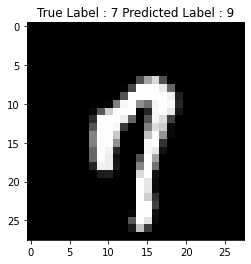

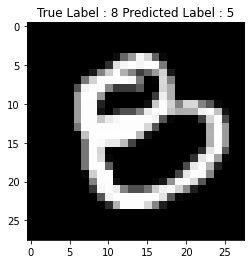

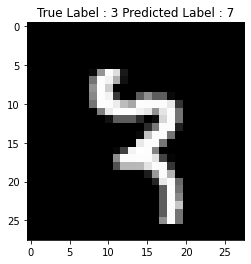

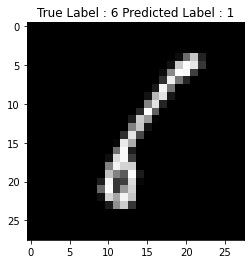

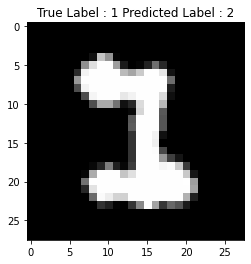

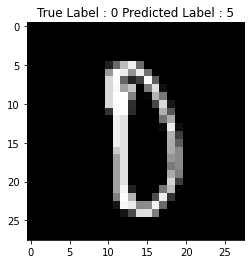

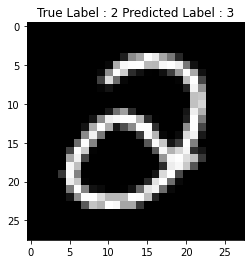

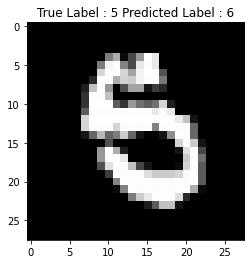

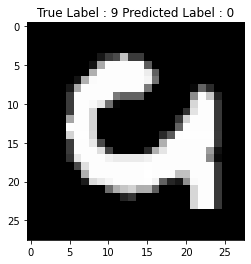

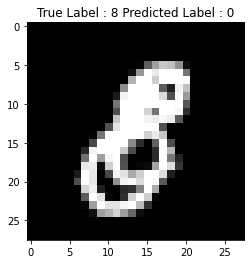

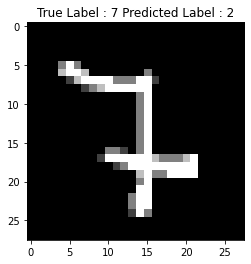

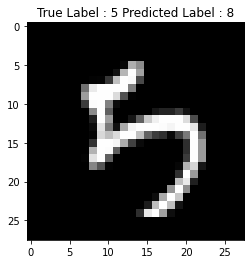

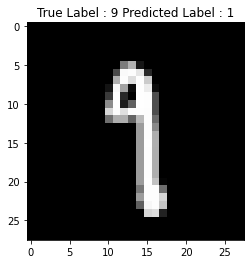

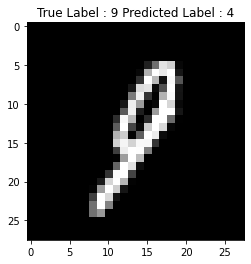

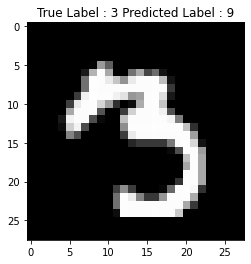

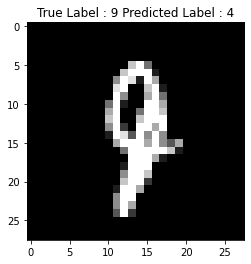

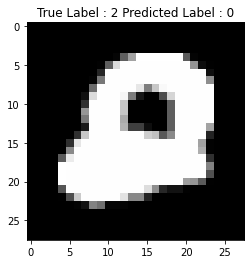

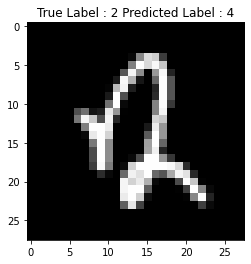

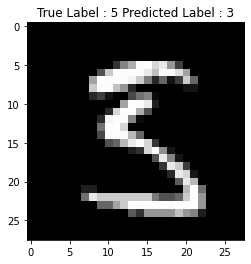

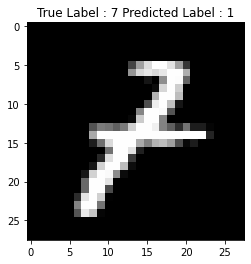

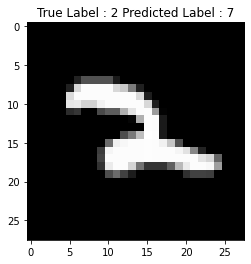

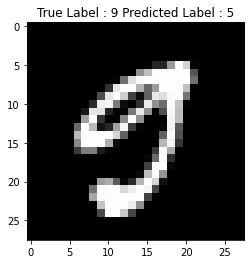

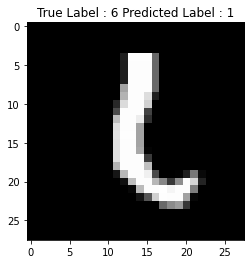

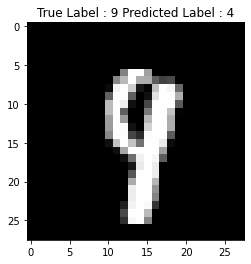

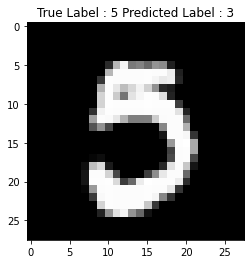

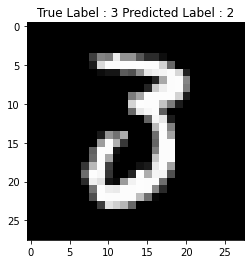

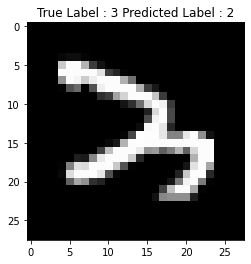

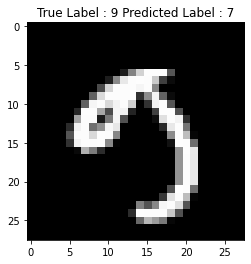

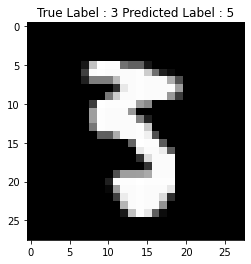

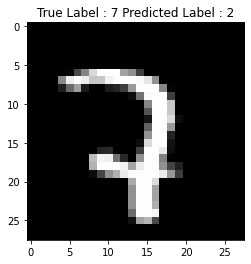

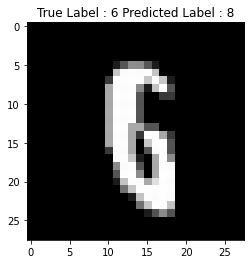

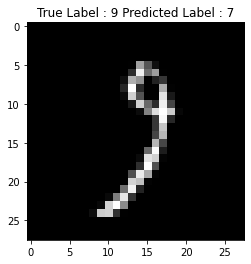

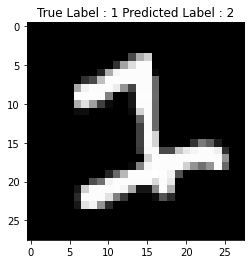

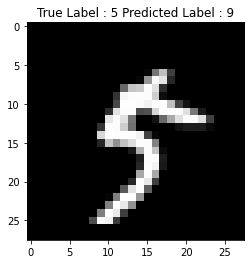

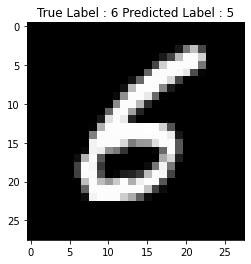

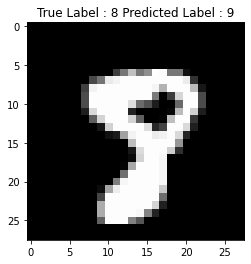

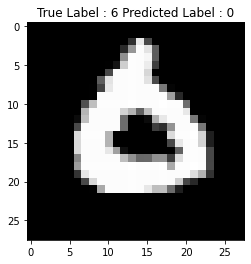

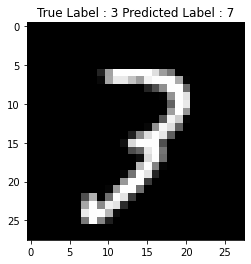

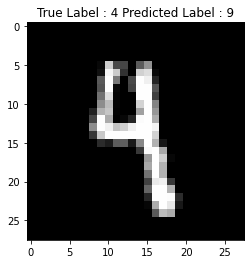

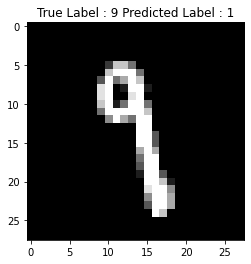

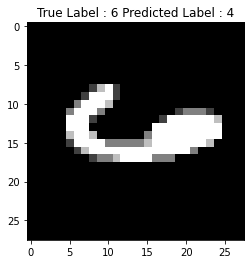

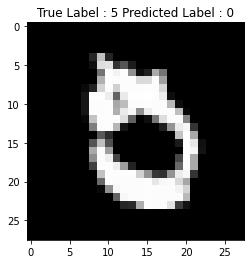

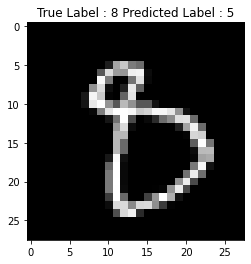

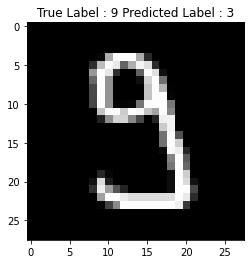

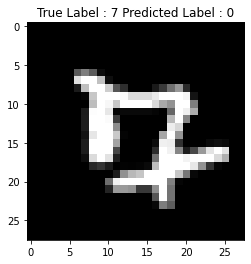

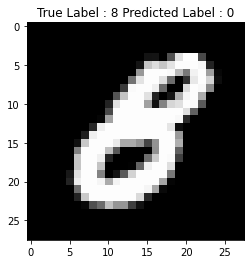

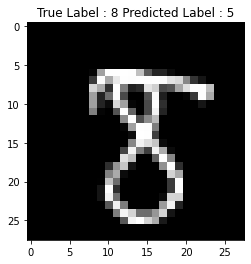

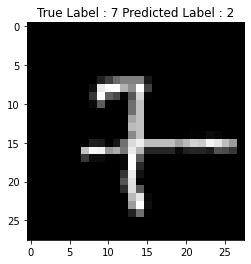

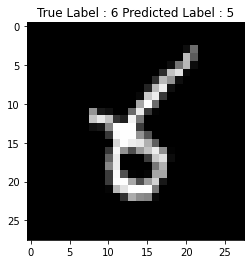

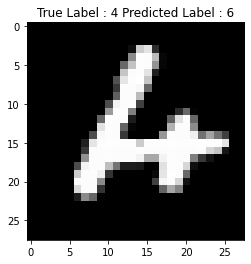

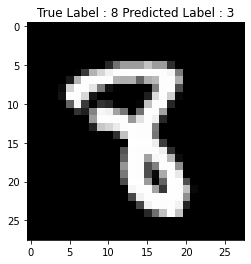

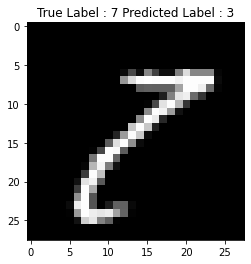

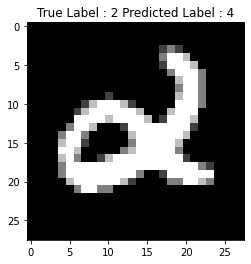

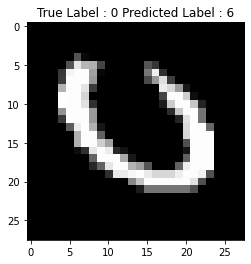

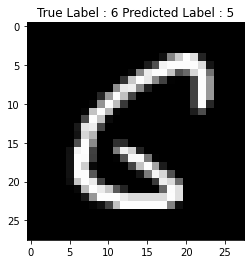

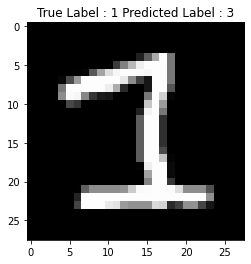

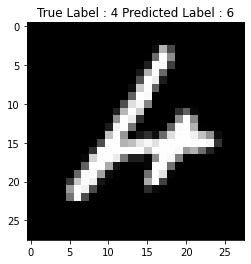

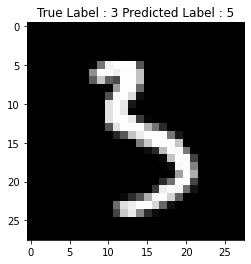

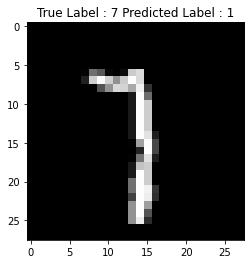

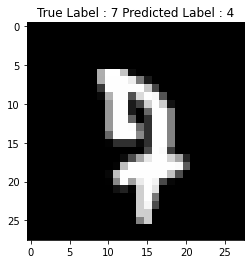

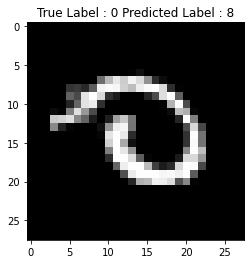

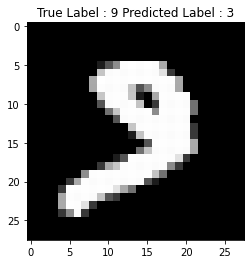

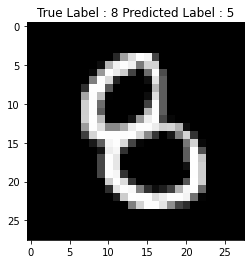

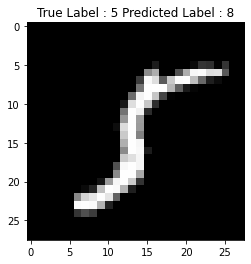

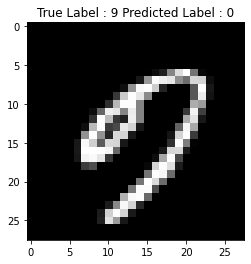

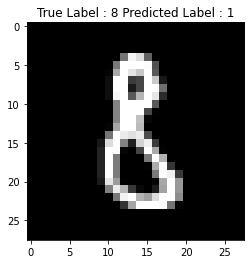

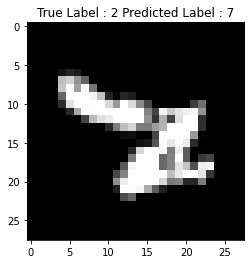

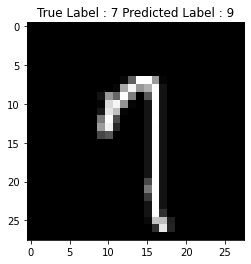

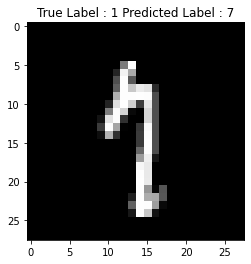

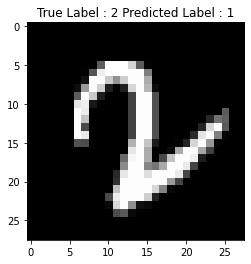

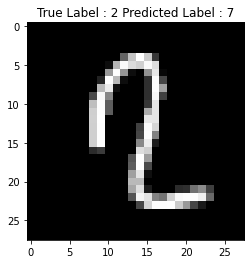

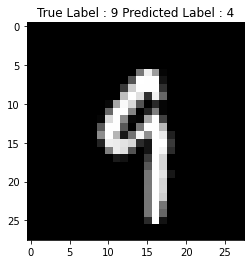

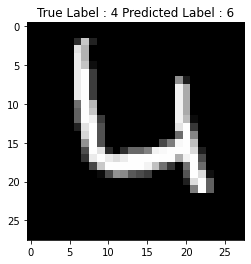

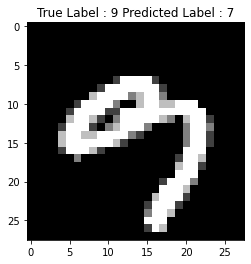

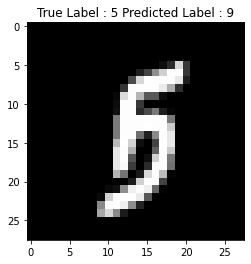

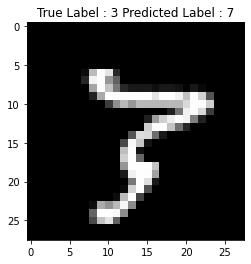

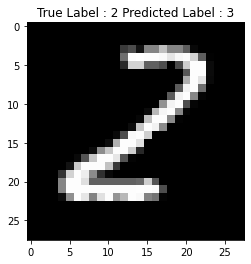

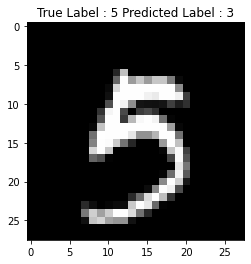

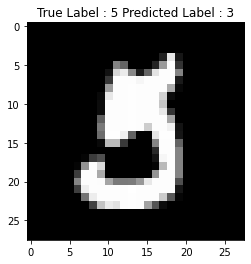

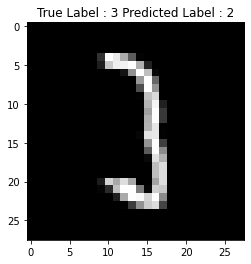

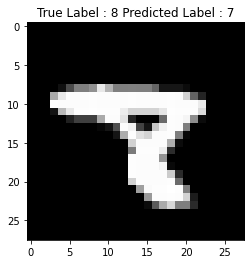

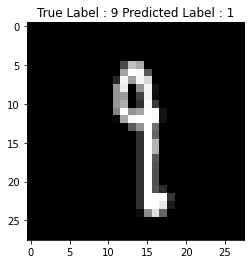

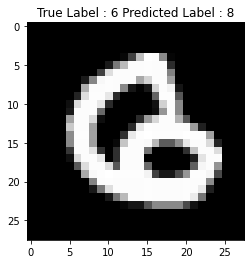

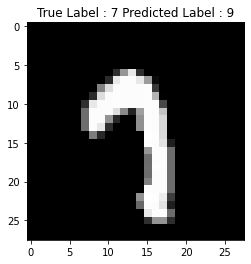

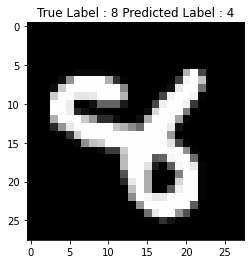

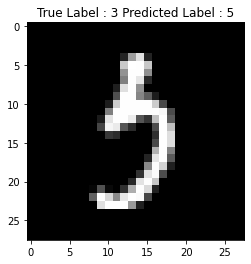

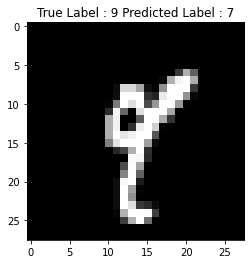

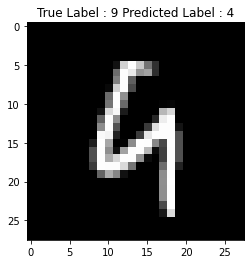

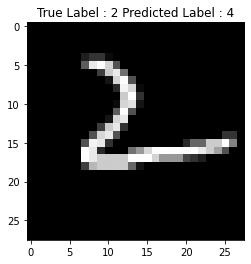

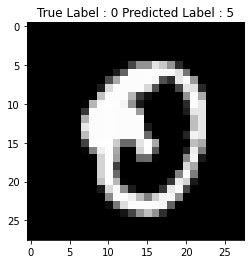

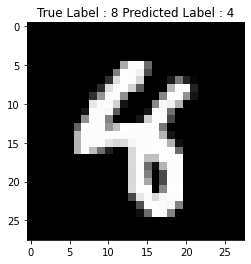

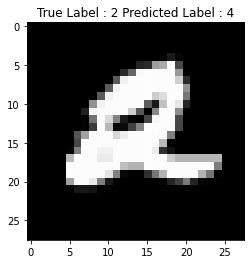

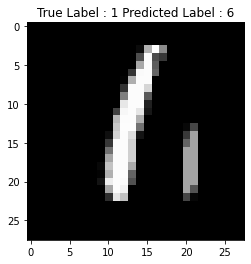

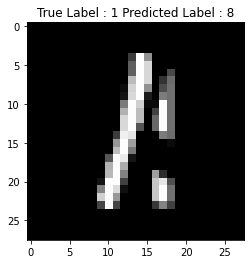

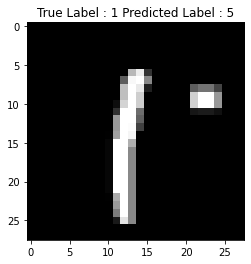

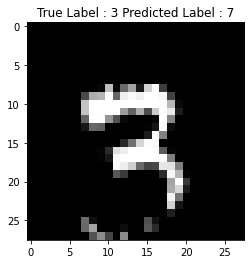

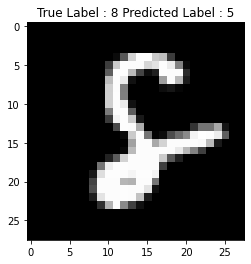

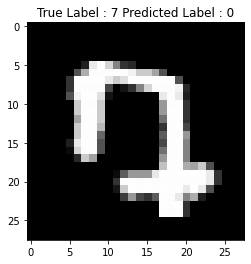

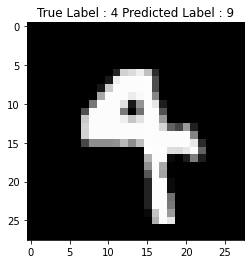

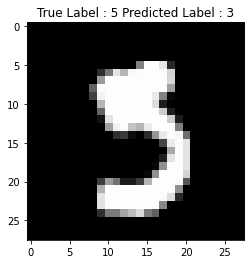

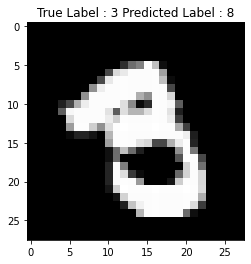

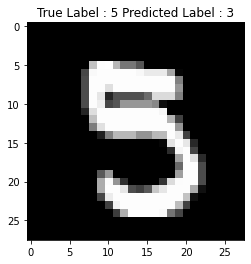

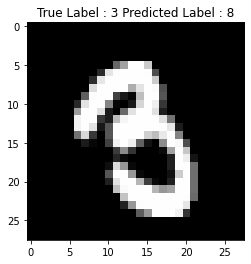

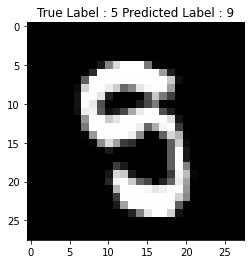

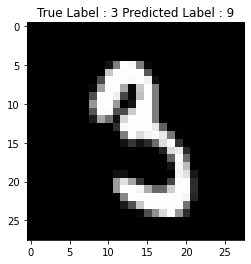

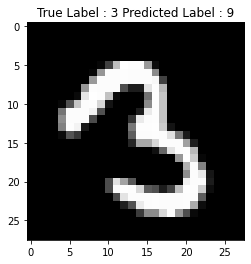

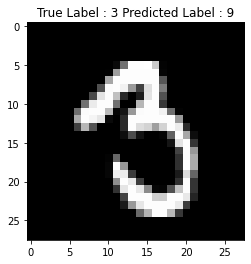

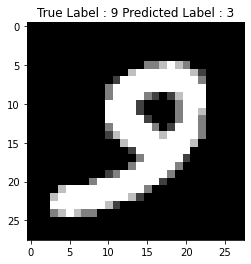

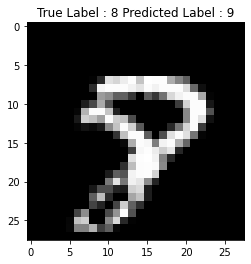

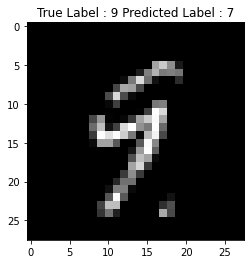

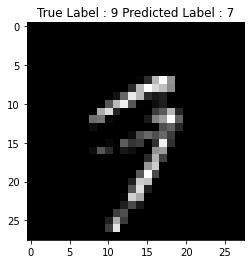

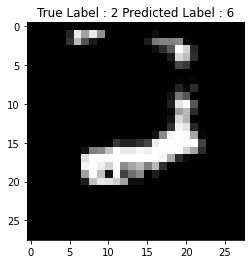

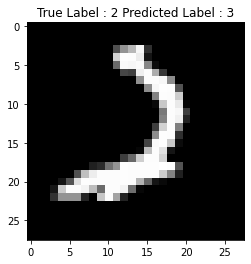

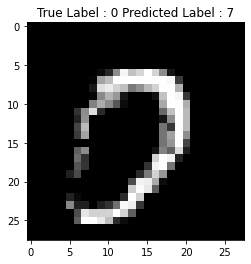

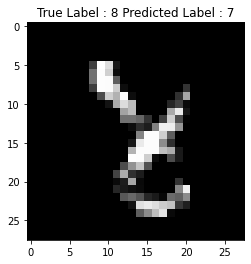

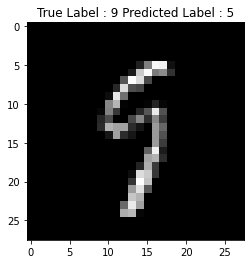

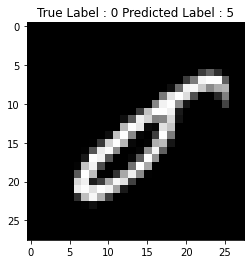

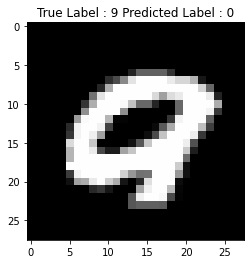

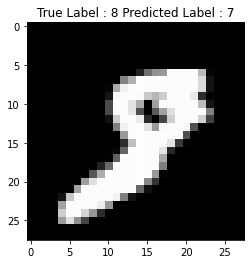

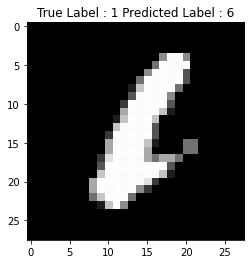

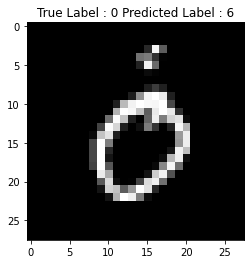

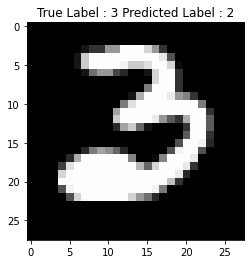

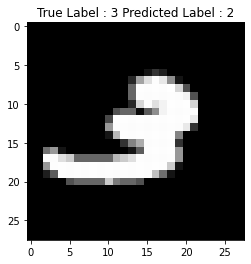

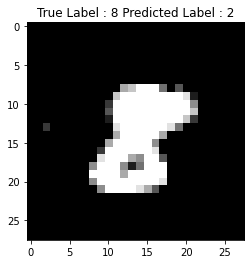

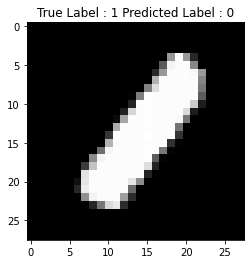

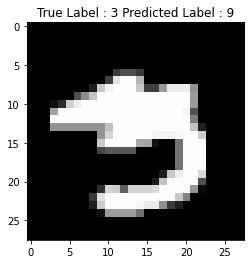

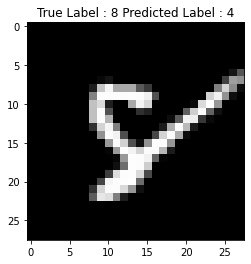

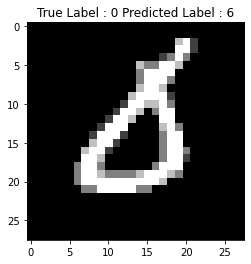

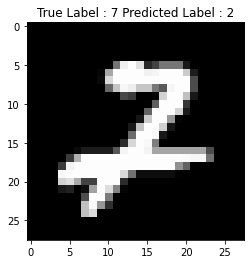

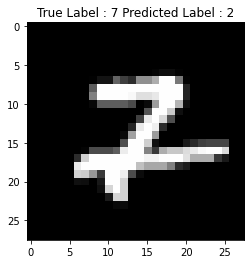

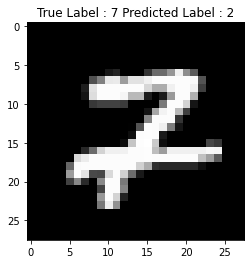

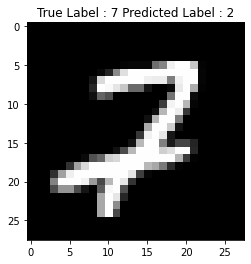

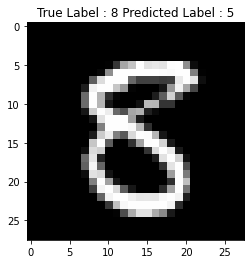

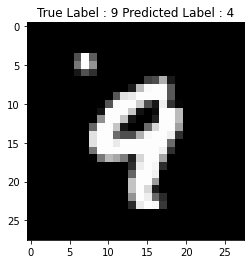

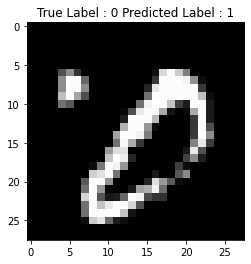

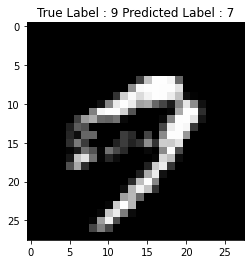

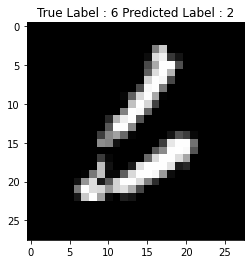

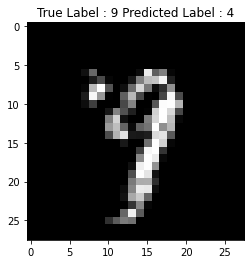

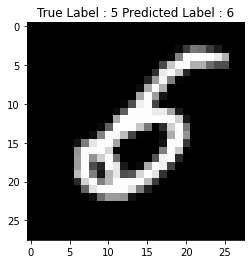

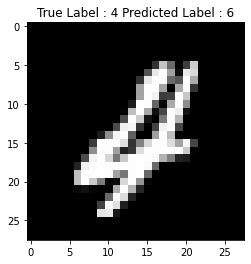

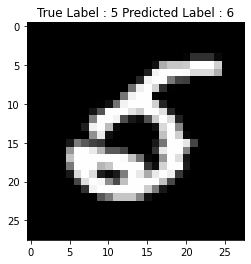

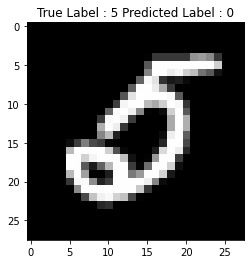

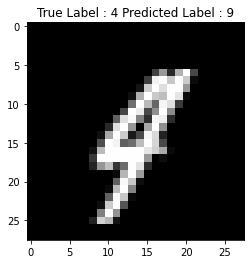

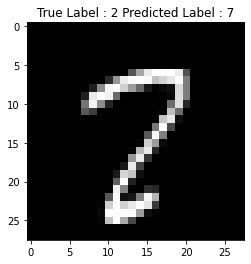

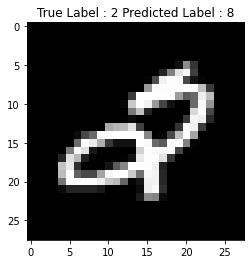

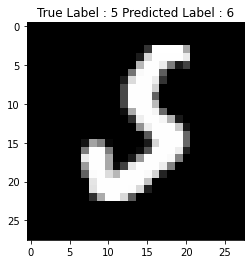

In [ ]:
count=0
import time
for i in range(len(x_test)):
  if(p_test[i]!=y_test[i]):
    count=count+1
    plt.figure()
    plt.imshow(x_test[i],cmap='gray')
    plt.title("True Label : %s Predicted Label : %s" %(y_test[i],p_test[i]))
    plt.show()
    

    